## All tests passed by CCA

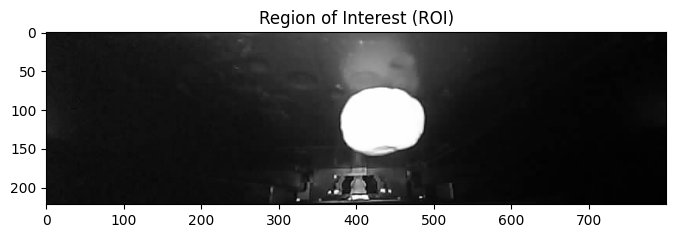

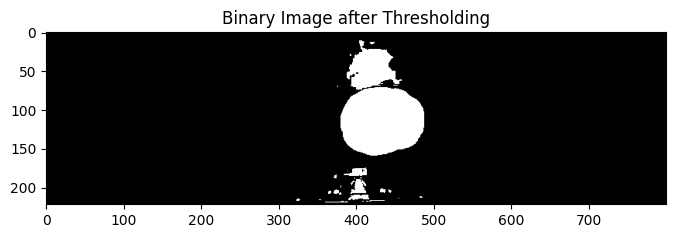

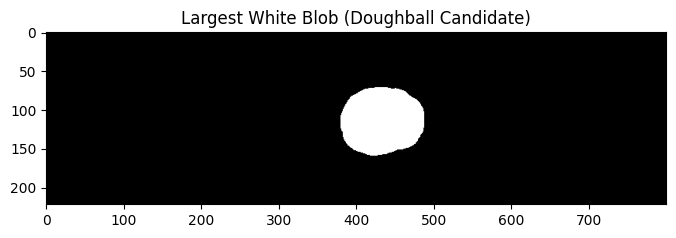

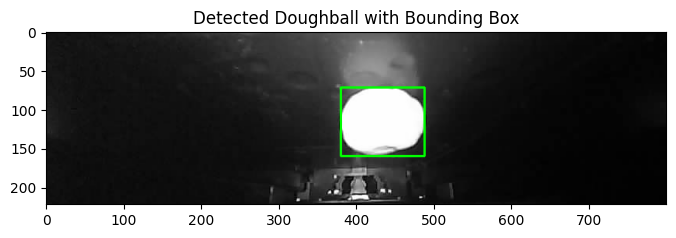

Doughball detected with area 7641.


True

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to detect doughball by analyzing white pixel regions
def detect_doughball_by_white_regions(image_path, height_ratio=0.37, threshold_value=127, area_threshold=200):
    # Step 1: Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print("Error: Image not found or unable to load.")
        return None

    height, width = image.shape

    # Step 2: Define the region of interest (ROI)
    roi_height = int(height * height_ratio)
    start_y = (height - roi_height) // 2  # Start from the middle, adjusting for roi height
    roi = image[start_y:start_y + roi_height, :]  # Full width, limited height

    # Debugging: Visualize the ROI
    plt.figure(figsize=(8, 6))
    plt.title("Region of Interest (ROI)")
    plt.imshow(roi, cmap='gray')
    plt.show()

    # Step 3: Apply binary thresholding
    _, binary_image = cv2.threshold(roi, threshold_value, 255, cv2.THRESH_BINARY)

    # Debugging: Visualize the binary threshold image
    plt.figure(figsize=(8, 6))
    plt.title("Binary Image after Thresholding")
    plt.imshow(binary_image, cmap='gray')
    plt.show()

    # Step 4: Find the largest connected component (blob)
    # Label the connected components in the binary image
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
    
    # Step 5: Find the largest component (excluding the background, label 0)
    largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])  # Label 0 is the background
    largest_component = (labels == largest_label).astype("uint8") * 255

    # Debugging: Visualize the largest component (blob)
    plt.figure(figsize=(8, 6))
    plt.title("Largest White Blob (Doughball Candidate)")
    plt.imshow(largest_component, cmap='gray')
    plt.show()

    # Step 6: Draw a bounding box around the largest blob
    x, y, w, h, area = stats[largest_label, cv2.CC_STAT_LEFT:cv2.CC_STAT_AREA + 1]
    
    # If the area of the blob is large enough, it's likely the doughball
    if area > area_threshold:
        result_image = cv2.cvtColor(roi, cv2.COLOR_GRAY2BGR)
        cv2.rectangle(result_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Debugging: Visualize the result with bounding box
        plt.figure(figsize=(8, 6))
        plt.title("Detected Doughball with Bounding Box")
        plt.imshow(result_image)
        plt.show()

        print(f"Doughball detected with area {area}.")
        return True
    else:
        print("No doughball detected.")
        return False


#image_path = 'CV Image Collection Doughball/01 DB Detection and Centering/800x600/Invalid Cases/Non recenterable DB/Trial 1.jpg'
#image_path = 'CV Image Collection Doughball/01 DB Detection and Centering/800x600/Invalid Cases/DB dragged by kicker to home/Trial 3.jpg' # db dragged by kicker to home
image_path = 'CV Image Collection Doughball/01 DB Detection and Centering/800x600/Invalid Cases/Cookie DB/Trial 3.jpg' # invalid case, cookie db
#image_path = 'CV Image Collection Doughball/01 DB Detection and Centering/800x600/With Load/DB at release position/Trial 3.jpg'  # Valid case at release position
# image_path = 'CV Image Collection Doughball/01 DB Detection and Centering/800x600/With Load/DB after 2nd tap/Trial 3.jpg'  # Valid case after second tapping
detect_doughball_by_white_regions(image_path)